## Chloropleth maps of attitudes towards foreigners and between population groups

In this notebook, I want to clean and play around with data related to attitudes towards foreigners and between population groups. In an ideal scenario, I would've used the data in geojson format instead of csv and also mapped on other elements onto the maps. However, I was having a lot of issues with the formatting of the data, in particular the geometry column of the "cleaned" data (although the data did seem to work just fine for my partner...). My kernel also kept on crashing, making it difficult for me to continue working on this further. I am not sure what I was doing wrong, but am going to try to figure that out this week. Solving this problem should allow me to map all the train and BRT stations onto these chloropleth maps, to show whether attitudes towards foreginers and between population groups differ significantly along transport routes. 

While I wasn't able to achieve exactly what I wanted, I instead used previous versions of the data to develop two chloropleth maps that show responses to 2 different variables

(i) Blacks and Whites will never really trust each other
(ii) It is acceptable to be violent towards foreigners 


In [1]:
# Importing all packages that will be necessary for the data exploration 

# Importing the pandas library 
import pandas as pd

from geopandas import GeoDataFrame

#For creating or removing a directory folder
import os

#To allow me to work with numerical data
import numpy as np

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

import plotly.express as px


/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Importing data and merging shapefile and csv (as was done in previous weeks)

In [2]:
qol17=pd.read_csv('qols-v-2017-2018-week5.csv')
wards_shp=gpd.read_file("MDB_Wards_2020.shp")

In [3]:
qol17=qol17.rename(columns={"ward":"WardID"})

In [4]:
wards_shp['WardID'] = wards_shp['WardID'].astype(int)

In [5]:
wards_mer = wards_shp.merge(qol17, on='WardID')

In [6]:
wards_mer.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 24889 entries, 0 to 24888
Data columns (total 90 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   FID                               24889 non-null  int64   
 1   Province                          24889 non-null  object  
 2   Municipali                        24889 non-null  object  
 3   CAT_B                             24889 non-null  object  
 4   WardNo                            24889 non-null  int64   
 5   District                          24889 non-null  object  
 6   DistrictCo                        24889 non-null  object  
 7   Date                              24889 non-null  object  
 8   WardID                            24889 non-null  int64   
 9   WardLabel                         24889 non-null  object  
 10  Shape__Are                        24889 non-null  float64 
 11  Shape__Len                        24889 non-nu

In [7]:
BW_trust = wards_mer['Q9_10_BW_trust'].value_counts()

In [8]:
BW_trust

Agree                         10620
Strongly agree                 5693
Disagree                       4173
Neither agree nor disagree     2568
Strongly disagree              1835
Name: Q9_10_BW_trust, dtype: int64

Through the loc function, linking a numerical value to each response to allow me to calculate the mean

In [9]:
wards_mer.loc[qol17['Q9_10_BW_trust']=='Strongly disagree','bw_trust_2']=0
wards_mer.loc[qol17['Q9_10_BW_trust']=='Disagree','bw_trust_2']=1
wards_mer.loc[qol17['Q9_10_BW_trust']=='Neither agree nor disagree','bw_trust_2']=2
wards_mer.loc[qol17['Q9_10_BW_trust']=='Agree','bw_trust_2']=3
wards_mer.loc[qol17['Q9_10_BW_trust']=='Strongly agree','bw_trust_2']=4
wards_mer [['Q9_10_BW_trust','bw_trust_2']]

,Q9_10_BW_trust,bw_trust_2
0,Strongly agree,2.0
1,Strongly agree,3.0
2,Agree,3.0
3,Strongly agree,3.0
4,Agree,3.0
...,...,...
24884,Strongly agree,3.0
24885,Agree,3.0
24886,Strongly agree,3.0
24887,Agree,3.0


Adding the column that calculates the mean

In [10]:
wards_mer_bw = wards_mer.groupby("WardID").mean('bw_trust_2')

In [11]:
wards_mer_bw

,FID,WardNo,Shape__Are,Shape__Len,resp_id,ea_code,sp_code,mp_code,duration,dwelling_count,adults_listed,males_listed,females_listed,weight,Q15_02_age,bw_trust_2
WardID,,,,,,,,,,,,,,,,
74201001,3250.0,1.0,3.163298e+07,36397.141731,61722.138889,7.601061e+07,7.600060e+08,760006.000000,34.935933,24.138889,1.555556,0.722222,0.833333,0.952245,47.611111,3.194444
74201002,3251.0,2.0,2.466977e+06,10296.574210,29780.702703,7.601089e+07,7.600040e+08,760004.000000,45.540605,17.486486,2.432432,1.000000,1.432432,0.821937,46.810811,2.837838
74201003,3252.0,3.0,6.355803e+06,14187.024822,42228.588235,7.601034e+07,7.600084e+08,760008.352941,39.873306,1.294118,2.088235,0.705882,1.382353,1.013353,43.176471,2.676471
74201004,3253.0,4.0,2.146762e+07,23503.943024,61607.000000,7.601021e+07,7.600077e+08,760007.676471,35.779961,26.264706,1.941176,0.970588,0.970588,0.909400,40.941176,2.470588
74201005,3254.0,5.0,1.607959e+07,19909.678454,63932.516129,7.601010e+07,7.600090e+08,760009.000000,33.987791,15.935484,1.612903,0.935484,0.677419,0.773040,44.903226,1.967742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79900103,3133.0,103.0,6.908203e+07,53995.586607,52918.555556,7.991127e+07,7.990545e+08,799054.472222,42.449792,1.055556,1.833333,0.833333,0.916667,1.314905,37.861111,2.861111
79900104,3134.0,104.0,2.853755e+07,24720.796256,56326.837838,7.991273e+07,7.990550e+08,799055.000000,38.540731,1.783784,2.189189,0.918919,1.270270,1.308937,38.486486,2.540541
79900105,3135.0,105.0,1.403451e+09,301186.236646,62270.870968,7.991163e+07,7.990508e+08,799050.774194,43.436847,3.903226,2.032258,0.967742,1.064516,1.655091,39.483871,3.064516


this is where I was having issues with the previous data, as remerging created additional geometry columns that I struggled to drop. Therefore the data couldn't be mapped. As mentioned above, I will try to find out more about what the issues behind this were. 

In [12]:
wards_mer_bw = wards_mer.merge(wards_mer_bw, on='WardID')

wards_mer_bw

,FID_x,Province,Municipali,CAT_B,WardNo_x,District,DistrictCo,Date,WardID,WardLabel,...,sp_code_y,mp_code_y,duration_y,dwelling_count_y,adults_listed_y,males_listed_y,females_listed_y,weight_y,Q15_02_age_y,bw_trust_2_y
0,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,7.980380e+08,798037.963636,41.568183,1.472727,2.090909,0.872727,1.218182,1.093334,38.236364,2.036364
1,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,7.980380e+08,798037.963636,41.568183,1.472727,2.090909,0.872727,1.218182,1.093334,38.236364,2.036364
2,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,7.980380e+08,798037.963636,41.568183,1.472727,2.090909,0.872727,1.218182,1.093334,38.236364,2.036364
3,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,7.980380e+08,798037.963636,41.568183,1.472727,2.090909,0.872727,1.218182,1.093334,38.236364,2.036364
4,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,7.980380e+08,798037.963636,41.568183,1.472727,2.090909,0.872727,1.218182,1.093334,38.236364,2.036364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24884,3424,Gauteng,Rand West City Local Municipality,GT485,35,West Rand,DC48,2020-11-26,74805035,GT485_35,...,7.650020e+08,765002.000000,33.065707,25.138889,1.916667,1.027778,0.888889,0.332841,40.083333,3.138889
24885,3424,Gauteng,Rand West City Local Municipality,GT485,35,West Rand,DC48,2020-11-26,74805035,GT485_35,...,7.650020e+08,765002.000000,33.065707,25.138889,1.916667,1.027778,0.888889,0.332841,40.083333,3.138889
24886,3424,Gauteng,Rand West City Local Municipality,GT485,35,West Rand,DC48,2020-11-26,74805035,GT485_35,...,7.650020e+08,765002.000000,33.065707,25.138889,1.916667,1.027778,0.888889,0.332841,40.083333,3.138889
24887,3424,Gauteng,Rand West City Local Municipality,GT485,35,West Rand,DC48,2020-11-26,74805035,GT485_35,...,7.650020e+08,765002.000000,33.065707,25.138889,1.916667,1.027778,0.888889,0.332841,40.083333,3.138889


Now to plotting the data...

As you can see in the areas that are darker, people are more likely to disagree with the statement that black and whites will never really trust each other. Most of these areas are on the outskirts of the city. The BRT is in the centre of the region, and here most people agree to some degree with the statement. This is something I would like to further explore in the next week. 

Text(0.5, 1.0, 'Blacks and Whites will never really trust each other (disagree=darker colours)')

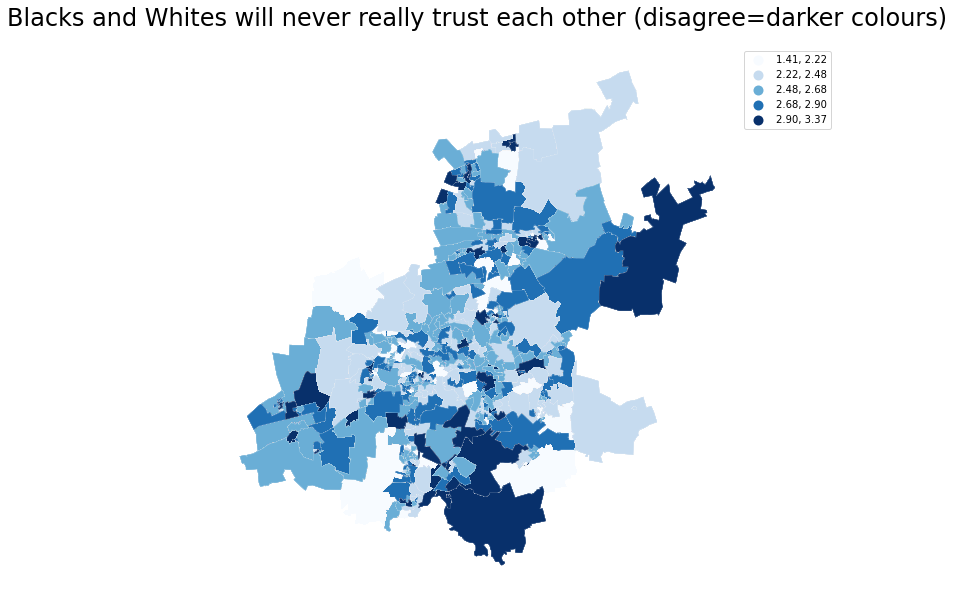

In [13]:
ax=wards_mer_bw.plot(figsize=(12,10),
                 column='bw_trust_2_y',
                 legend=True,
                 scheme='NaturalBreaks',
              cmap='Blues', edgecolor='white', linewidth=0.1,
                            legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})  

ax.axis('off')

ax.set_title('Blacks and Whites will never really trust each other (disagree=darker colours)',fontsize=24, pad=20)


## Chloropleth map for 2017 violence towards foreigners

I did the same steps as before for the other variable "violence towards foreigners"

In [14]:
violence_foreigners = wards_mer['Q9_07_foreigners'].value_counts()

In [15]:
violence_foreigners 

Disagree                      13385
Strongly disagree              8619
Agree                          1476
Neither agree nor disagree      931
Strongly agree                  478
Name: Q9_07_foreigners, dtype: int64

In [16]:
wards_mer.loc[wards_mer['Q9_07_foreigners']=='Strongly disagree','violence_foreigners']=4
wards_mer.loc[wards_mer['Q9_07_foreigners']=='Disagree','violence_foreigners']=3
wards_mer.loc[wards_mer['Q9_07_foreigners']=='Neither agree nor disagree','violence_foreigners']=2
wards_mer.loc[wards_mer['Q9_07_foreigners']=='Agree','violence_foreigners']=1
wards_mer.loc[wards_mer['Q9_07_foreigners']=='Strongly agree','violence_foreigners']=0
wards_mer [['Q9_07_foreigners','violence_foreigners']]

,Q9_07_foreigners,violence_foreigners
0,Strongly disagree,4.0
1,Strongly disagree,4.0
2,Neither agree nor disagree,2.0
3,Strongly disagree,4.0
4,Disagree,3.0
...,...,...
24884,Disagree,3.0
24885,Disagree,3.0
24886,Neither agree nor disagree,2.0
24887,Disagree,3.0


In [17]:
#create ward level dataset with ward average wards_mer_foreigners variable
wards_mer_foreigners = wards_mer.groupby("WardID").mean('violence_foreigners')

# check ward level trust var
wards_mer_foreigners.head()

# merge ward level trust var back to ward level shape data (again)

wards_mer_foreigners = wards_mer.merge(wards_mer_foreigners, on='WardID')

wards_mer_foreigners.head()

,FID_x,Province,Municipali,CAT_B,WardNo_x,District,DistrictCo,Date,WardID,WardLabel,...,mp_code_y,duration_y,dwelling_count_y,adults_listed_y,males_listed_y,females_listed_y,weight_y,Q15_02_age_y,bw_trust_2_y,violence_foreigners_y
0,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,798037.963636,41.568183,1.472727,2.090909,0.872727,1.218182,1.093334,38.236364,2.036364,3.0
1,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,798037.963636,41.568183,1.472727,2.090909,0.872727,1.218182,1.093334,38.236364,2.036364,3.0
2,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,798037.963636,41.568183,1.472727,2.090909,0.872727,1.218182,1.093334,38.236364,2.036364,3.0
3,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,798037.963636,41.568183,1.472727,2.090909,0.872727,1.218182,1.093334,38.236364,2.036364,3.0
4,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,798037.963636,41.568183,1.472727,2.090909,0.872727,1.218182,1.093334,38.236364,2.036364,3.0


Text(0.5, 1.0, 'It is acceptable to be violent towards foreigners (disagree=darker colours)')

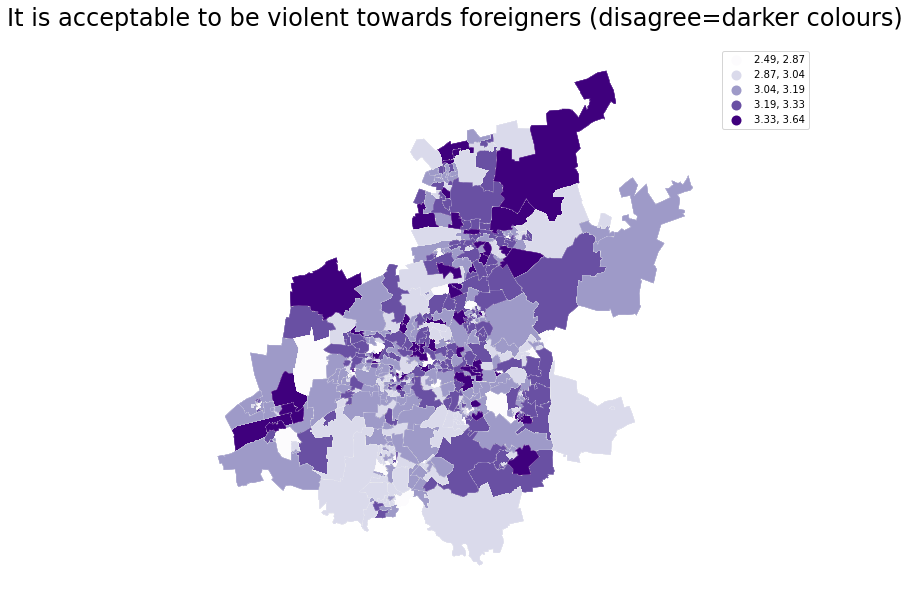

In [18]:
ax=wards_mer_foreigners.plot(figsize=(12,10),
                 column='violence_foreigners_y',
                 legend=True,
                 scheme='NaturalBreaks',
              cmap='Purples', edgecolor='white', linewidth=0.1,
                            legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})  

ax.axis('off')

ax.set_title('It is acceptable to be violent towards foreigners (disagree=darker colours)',fontsize=24, pad=20)

Here we can see that the darker colours disagree with the statement that it is acceptable to be violent towards foreigners. However interestingly there are clusters where people think it is more acceptable. Again, this is something I want to explore in relation to the transit lines. 